<a href="https://colab.research.google.com/github/chakatzib/CS430/blob/main/Classification_In_class_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction: Model Selection and Hyperparameter Tuning

In this notebook, you will:
1. Load the Titanic dataset from an online source.
2. Perform basic EDA to understand the data.
3. Use pipelines to preprocess numerical and categorical data.
4. Train and evaluate multiple classification models (KNN, SVC, Random Forest, Decision Tree, Logistic Regression, Bagging, and Boosting).
5. Conduct hyperparameter tuning to find the best model.
6. Write reflection on the findings

---

## 1. Importing Libraries
**Task**: Import the necessary libraries for data handling, visualization, model training, and evaluation.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

[link text](`https:// [link text](https://`))## 2. Load the titanic dataset from seaborn

In [ ]:
titanic = sns.load_dataset('titanic')



## 3. Basic EDA (Exploratory Data Analysis)
Question 1: What is the shape of the dataset?

In [ ]:
titanic.shape

(891, 15)

Question 2: Are there any missing values?

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Question 3: Visualize some relationships (atleast 3). such as:

- The distribution of numerical features like age and fare.
- The survival rate by different classes, gender, etc.

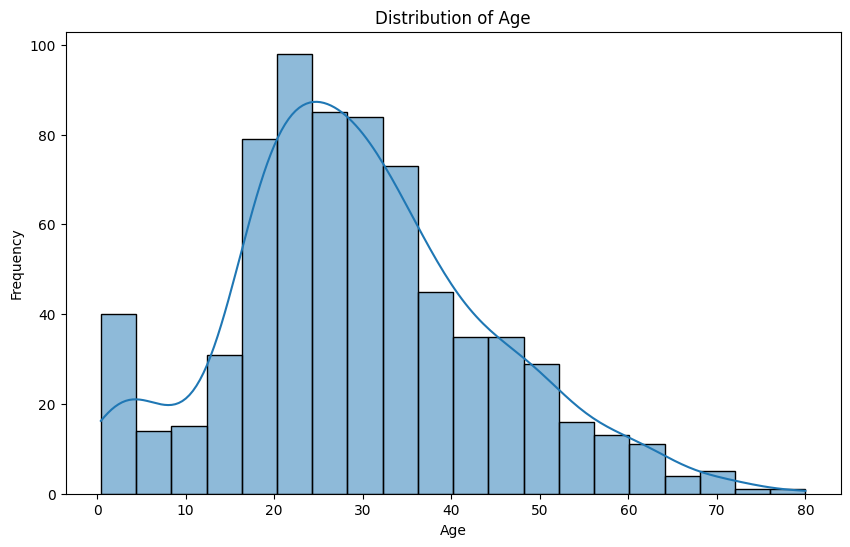

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#one or two more graphs

In [ ]:
# Split the data into features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'embarked', 'who', 'alone']]
y = titanic['survived']




### Split the data into training and testing sets

In [ ]:
#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Data Preprocessing with Pipelines
Task: Create a data preprocessing pipeline for numerical and categorical features.

- Numerical features: Use StandardScaler to scale them.
- Categorical features: Use OneHotEncoder to encode them.
- impute missing values

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#preprocessing pipeline
numeric_features = ['age', 'fare','pclass']
categorical_features = [ 'sex', 'embarked', 'who', 'alone']
# create a numerical data transformer and impute missing values
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

# create a categorical data transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Training data with multiple models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


# Evaluate each model
for model_name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy and classification report
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))




Model: K-Nearest Neighbors
Accuracy: 0.8268156424581006

Model: Logistic Regression
Accuracy: 0.8100558659217877

Model: Decision Tree
Accuracy: 0.770949720670391

Model: Random Forest
Accuracy: 0.8100558659217877

Model: Support Vector Machine
Accuracy: 0.8044692737430168

Model: Bagging Classifier
Accuracy: 0.8044692737430168

Model: Gradient Boosting
Accuracy: 0.8268156424581006


#Hyperparameter Tuning
## Define parameter grids for the top 2 models
Example:
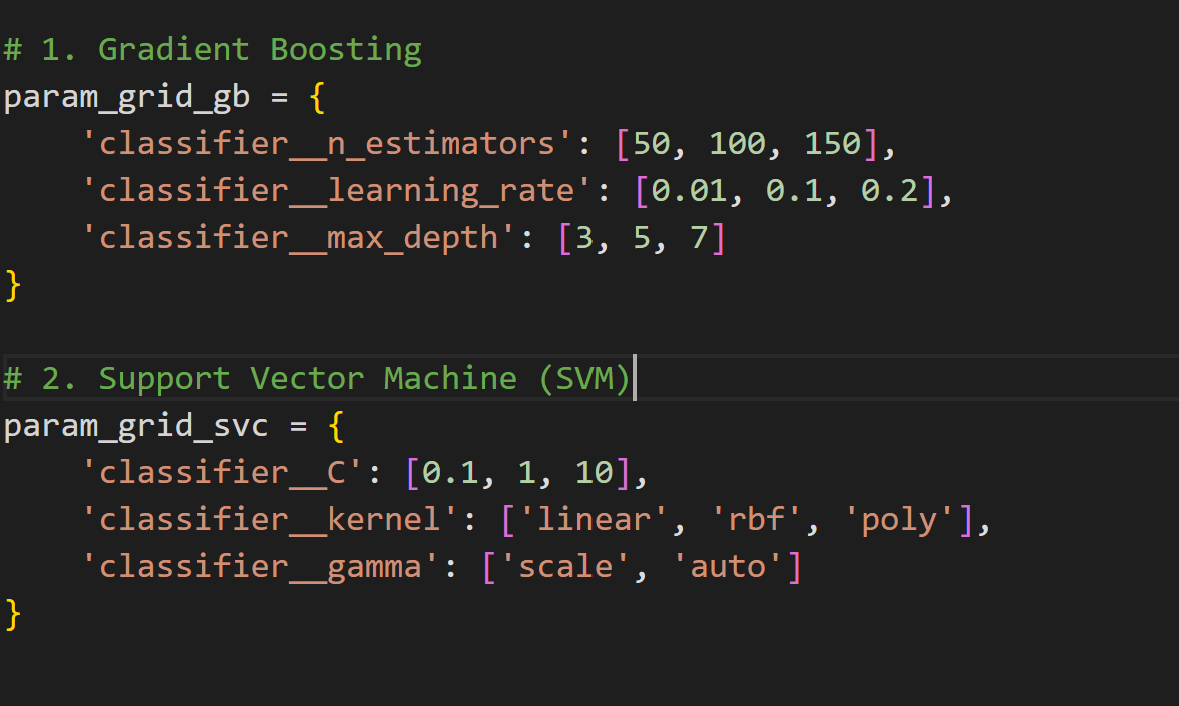

In [ ]:
#parameter grid for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_param_grid = {'classifier__n_estimators':[50,100,150],
                 'classifier__learning_rate':[.01,.1,.2],
                 'classifier__max_depth':[1,2,3]}

In [ ]:
#parameter grid for K Nearest Neighborhood
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = {'classifier__n_neighbors':[5,10,15,20],
                  'classifier__weights':['uniform','distance']}

## List of models and their corresponding parameter grids
Example
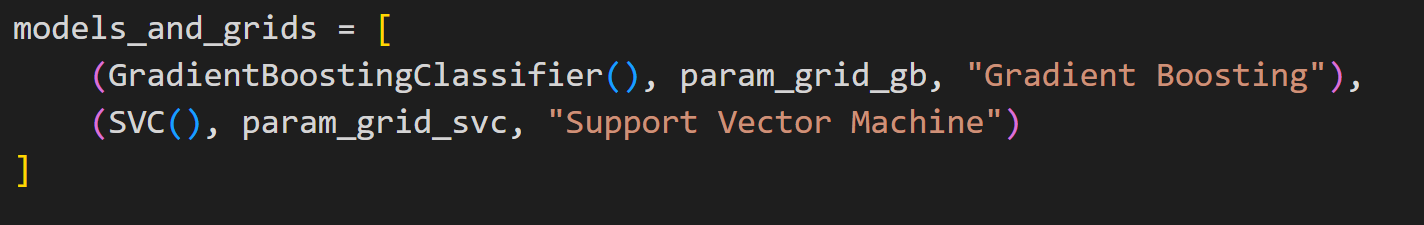

In [ ]:
models_and_grids=[
    (GradientBoostingClassifier(), gb_param_grid,'Gradient Boosting'),
    (KNeighborsClassifier(), knn_param_grid,'K-Nearest Neighbors')
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Loop through each model and perform GridSearchCV
for model, param_grid, model_name in models_and_grids:
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Output the best parameters and best cross-validation score for each model
    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.4f}")


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 2, 'classifier__n_estimators': 150}
Best cross-validation accuracy for Gradient Boosting: 0.8329

Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 20, 'classifier__weights': 'uniform'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8160


## 7.Reflection and Analysis
Which model performed the best without tuning?

1. Based on the initial accuracy scores, which model had the highest accuracy before hyperparameter tuning?
**KNN and gradient boosting had the highest accuracy scores before hyperparameter tuning**

2. What are two best top performing model? How did hyperparameter tuning affect the top-performing models?
**KNN and Gradient boosting were once again, the best models, and hyperparameter tuning appears to have actually hurt the KNN model**
3. Compare the accuracy scores before and after tuning for each of the top-performing models. Which model showed the most improvement?
**Gradient Boosting had the most improvement**
4. Summarize the optimal parameters found during hyperparameter tuning. How do these optimal parameters differ from the default ones?
**Optimal Parameters for Gradient Boosting are a classifier__learning_rate of 0.2, classifier__max_depth of 2, and classifier__n_estimators of 150**
5. Did any model experience overfitting after tuning?
Examine the training versus test accuracy for each of the top models after tuning.
**I think that the KNN model experienced overfitting, as it became less accurate after the hyperparameter tuning**

Based on your findings, which model would you select for deployment, and why?

6. Considering both performance (accuracy) and other factors like model complexity and interpretability, which model would you choose as the best candidate for deployment? Explain your reasoning.
**I would choose Gradient Boosting as my model, as it was relatively simple to impliment, gave very nice results/performance, and is relatively interpretable. I don't understand the other models as well and they didnt perform as well either.**